# Biblioteki Pythona w analizie danych
### Tomasz Rodak

Lab 9

---



## Sieci konwolucyjne - podstawy

### 1.

Oblicz $\mathbf{I} \ast \mathbf{K}$ dla:

\begin{equation*}
\mathbf{I} = \begin{bmatrix}
2 & 5 & -3 & 0 \\
0 & 6 & 0 & -4 \\
-1 & -3 & 0 & 2 \\
5 & 0 & 0 & 3
\end{bmatrix}
\text{ oraz } \mathbf{K} = \begin{bmatrix}
-2 & 0 \\
4 & 6
\end{bmatrix}
\end{equation*}

### 2.

Rozważmy fragment sieci konwolucyjnej o architekturze:

**Wejście:** Obraz $x$ o rozmiarze $1 \times 224 \times 224$

| Nr | Warstwa            | Parametry                                                                      |
| -- | ------------------ | ------------------------------------------------------------------------------ |
| 1  | $\mathrm{Conv}$ C1 | filtr $5\times5$, stride=1, padding=0 i padding=2 (warianty), 6 filtrów, ReLU  |
| 2  | $\mathrm{Conv}$ C2 | filtr $3\times3$, stride=1, padding=0 i padding=1 (warianty), 16 filtrów, ReLU |



Oblicz:
1. Rozmiar wyjścia z warstwy C1.
2. Rozmiar wyjścia z warstwy C2.
3. Rozmiar okna (*receptive field*) na obrazie $x$ "widzianego" przez filtr konwolucyjny z warstwy C2.
4. Dokładną liczbę parametrów (zarówno wag, jak i biasów) w warstwach C1 oraz C2.

Zbuduj ten fragment sieci konwolucyjnej w PyTorch i zweryfikuj poprawność obliczeń.

Rozwiąż to samo zadanie dla architektury:

**Wejście:** Obraz $x$ o rozmiarze $1 \times 224 \times 224$
| Nr | Warstwa            | Parametry                                                                      |
| -- | ------------------ | ------------------------------------------------------------------------------ |
| 1  | $\mathrm{Conv}$ C1 | filtr $5\times5$, stride=2, padding=0 i padding=2 (warianty), 6 filtrów, ReLU  |
| 2  | $\mathrm{Conv}$ C2 | filtr $3\times3$, stride=2, padding=0 i padding=1 (warianty), 16 filtrów, ReLU |

In [2]:

import torch
import torch.nn as nn
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=0)
    self.relu = nn.ReLU()
  def forward(self, x):
    x = self.relu(self.conv1(x))
    x = self.relu(self.conv2(x))
    return x

In [3]:
x = torch.randn(1, 1, 224, 224)
model = CNN()
output = model(x)
print(output.shape)

torch.Size([1, 16, 218, 218])


In [15]:
for name, p in model.named_parameters():
  print(f"{name}: {p.shape}")

conv1.weight: torch.Size([6, 1, 5, 5])
conv1.bias: torch.Size([6])
conv2.weight: torch.Size([16, 6, 3, 3])
conv2.bias: torch.Size([16])


In [13]:
pip install torchinfo

In [14]:
import torchinfo
torchinfo.summary(model, input_size=(1, 1, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [1, 16, 218, 218]         --
├─Conv2d: 1-1                            [1, 6, 220, 220]          156
├─ReLU: 1-2                              [1, 6, 220, 220]          --
├─Conv2d: 1-3                            [1, 16, 218, 218]         880
├─ReLU: 1-4                              [1, 16, 218, 218]         --
Total params: 1,036
Trainable params: 1,036
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 49.37
Input size (MB): 0.20
Forward/backward pass size (MB): 8.41
Params size (MB): 0.00
Estimated Total Size (MB): 8.61

### 3.


Dany jest fragment sieci konwolucyjnej o architekturze:

**Wejście:** Obraz $x$ o rozmiarze $1 \times 224 \times 224$.

| Nr | Warstwa            | Parametry                                                                      |
| -- | ------------------ | ------------------------------------------------------------------------------ |
| 1  | $\mathrm{Conv}$ C1 | filtr $5\times5$, stride=1, padding=0, 6 filtrów, ReLU                        |
| 2  | MaxPool P1         | okno $2\times2$, stride=2                                                      |
| 3  | $\mathrm{Conv}$ C2 | filtr $3\times3$, stride=1, padding=0, 16 filtrów, ReLU                       |
| 4  | MaxPool P2         | okno $2\times2$, stride=2                                                      |



Oblicz:
1. Rozmiary wyjścia z każdej kolejnej warstwy.
2. Rozmiar okna na obrazie $x$ "widzianego" przez okno poolingu z warstwy P1.
3. Rozmiar okna na obrazie $x$ "widzianego" przez filtr konwolucyjny z warstwy C2.
4. Rozmiar okna na obrazie $x$ "widzianego" przez okno pooling z warstwy P2.
5. Dokładną liczbę parametrów w sieci.

Zbuduj ten fragment sieci konwolucyjnej w PyTorch i zweryfikuj poprawność obliczeń.

### 4.

Zaproponuj własną architekturę sieci CNN do klasyfikacji obrazów CIFAR-10. Są to obrazy kolorowe o rozmiarze $32 \times 32$ pikseli i 10 klasach.

Wykonaj testowy trening, aby upewnić się, że dane są poprawnie wczytywane i architektura działa. Dane można wczytać z repozytoriów PyTorch:

```python
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
```

In [20]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100%|██████████| 170M/170M [00:10<00:00, 15.5MB/s]


In [21]:
# prompt: Zaproponuj własną architekturę sieci CNN do klasyfikacji obrazów CIFAR-10. Są to obrazy kolorowe o rozmiarze 32×32 pikseli i 10 klasach.
# Wykonaj testowy trening, aby upewnić się, że dane są poprawnie wczytywane i architektura działa. Dane można wczytać z repozytoriów PyTorch:

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Define the CNN architecture
class CIFAR10CNN(nn.Module):
    def __init__(self):
        super(CIFAR10CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512) # Adjusted for CIFAR-10 image size
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8) # Adjusted for CIFAR-10 image size
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = CIFAR10CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Create data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Perform a test training loop (one epoch)
for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')


[1,   200] loss: 1.603
[1,   400] loss: 1.284
[1,   600] loss: 1.153
Finished Training


In [23]:
# prompt: accuracy for test set

# Evaluate the model on the test set
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the test images: {accuracy:.2f} %')


Accuracy of the network on the test images: 64.46 %


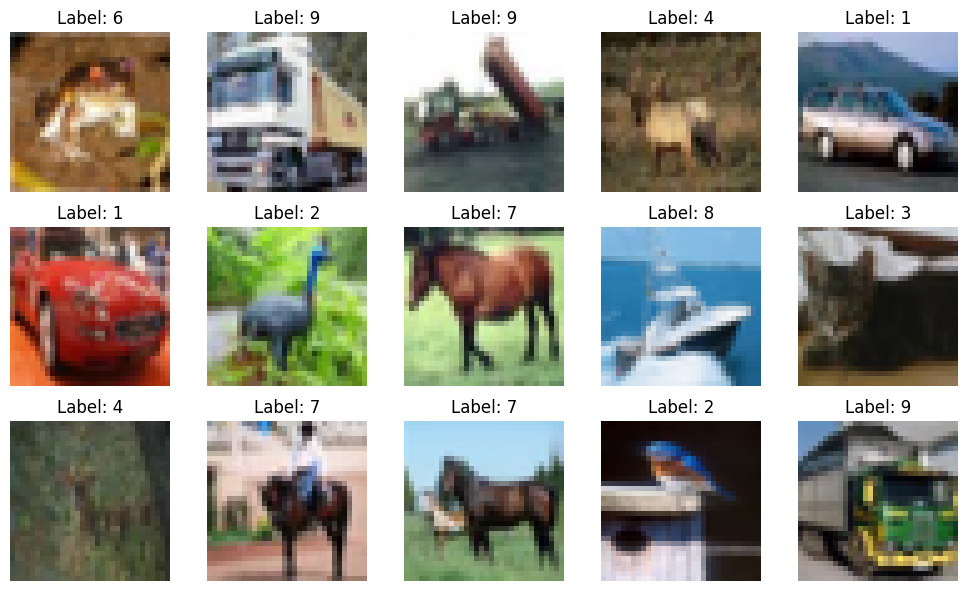

Image 0: Predicted label: 3, Actual label: 6
Image 1: Predicted label: 9, Actual label: 9
Image 2: Predicted label: 9, Actual label: 9
Image 3: Predicted label: 4, Actual label: 4
Image 4: Predicted label: 1, Actual label: 1
Image 5: Predicted label: 1, Actual label: 1
Image 6: Predicted label: 2, Actual label: 2
Image 7: Predicted label: 7, Actual label: 7
Image 8: Predicted label: 8, Actual label: 8
Image 9: Predicted label: 9, Actual label: 3
Image 10: Predicted label: 4, Actual label: 4
Image 11: Predicted label: 7, Actual label: 7
Image 12: Predicted label: 7, Actual label: 7
Image 13: Predicted label: 1, Actual label: 2
Image 14: Predicted label: 9, Actual label: 9


In [22]:
# prompt: wyswietl jakies zdjecia i daj modelowi je do klasyfikacji

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'trainset' is already loaded as in the provided code
# Display some images from the CIFAR-10 training set
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 6))

for i in range(15):
  ax = axes[i // 5, i % 5]
  image, label = trainset[i]
  image = image.permute(1, 2, 0).numpy() # convert tensor to numpy array
  # Undo normalization (for display purposes)
  image = image / 2 + 0.5

  ax.imshow(image)
  ax.axis('off')
  ax.set_title(f'Label: {label}')
plt.tight_layout()
plt.show()


# Example of how to get predictions from your model for those displayed images
# Note: The model has not been properly trained in this code block,
# so the predictions won't be meaningful.
# You need to train your model to get good accuracy.
with torch.no_grad():
  for i in range(15):
    image, label = trainset[i]
    image = image.unsqueeze(0)  # Add batch dimension
    output = model(image)
    _, predicted = torch.max(output, 1)

    print(f"Image {i}: Predicted label: {predicted.item()}, Actual label: {label}")


### 5.

Oblicz ręcznie liczbę parametrów w sieci VGG16. Architekturę sieci znajdziesz w [C. Bishop, Deep Learning](https://www.bishopbook.com/), strona 300.

Potwierdź poprawność obliczeń w PyTorch. Model z losowymi wagami (szybciej się ładuje) możesz pobrać przy pomocy:

```python
import torch
import torchvision.models as models

vgg16 = models.vgg16(pretrained=False)
```

Zobacz [torchvision.models](https://pytorch.org/vision/stable/models.html#torchvision.models.vgg16).

In [16]:
import torch
import torchvision.models as models

vgg16 = models.vgg16(weights=None)

In [17]:
x = torch.randn(1, 3, 224, 224)
output = vgg16(x)
print(output.shape)

torch.Size([1, 1000])


In [19]:
for name,p in vgg16.named_parameters():
  print(f"{name}: {p.shape}, liczba elementow: {p.numel()}")

features.0.weight: torch.Size([64, 3, 3, 3]), liczba elementow: 1728
features.0.bias: torch.Size([64]), liczba elementow: 64
features.2.weight: torch.Size([64, 64, 3, 3]), liczba elementow: 36864
features.2.bias: torch.Size([64]), liczba elementow: 64
features.5.weight: torch.Size([128, 64, 3, 3]), liczba elementow: 73728
features.5.bias: torch.Size([128]), liczba elementow: 128
features.7.weight: torch.Size([128, 128, 3, 3]), liczba elementow: 147456
features.7.bias: torch.Size([128]), liczba elementow: 128
features.10.weight: torch.Size([256, 128, 3, 3]), liczba elementow: 294912
features.10.bias: torch.Size([256]), liczba elementow: 256
features.12.weight: torch.Size([256, 256, 3, 3]), liczba elementow: 589824
features.12.bias: torch.Size([256]), liczba elementow: 256
features.14.weight: torch.Size([256, 256, 3, 3]), liczba elementow: 589824
features.14.bias: torch.Size([256]), liczba elementow: 256
features.17.weight: torch.Size([512, 256, 3, 3]), liczba elementow: 1179648
features

### 6.

Zaimplementuj w PyTorch własną sekwencyjną sieć konwolucyjną (bez pretrenowanych wag) do klasyfikacji zbioru Fashion-MNIST. Architektura powinna zawierać:

1. Co najmniej 2 warstwy konwolucyjne
2. Warstwę `BatchNorm2d` po każdej konwolucji
3. Funkcje aktywacji `ReLU`
4. Pooling do redukcji wymiarowości
5. Klasyfikator w pełni połączony na końcu sieci

Zadanie obejmuje:
- Implementację modelu
- Przygotowanie danych treningowych i testowych
- Napisanie funkcji trenującej
- Ewaluację dokładności na zbiorze testowym